In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Importing the dataset
df = pd.read_csv('credit_DataPrep.csv', sep=';')
df.head(15)

,Gender,Married,Dependents,Education,Employed,ApplicantIncome,Property_Area,Credit_History,Loan_Status
0,0,0,0,0,0,8.674026,0,1.0,0
1,0,1,1,0,0,8.430109,1,1.0,1
2,0,1,0,0,1,8.006368,0,1.0,0
3,0,1,0,1,0,7.856707,0,1.0,0
4,0,0,0,0,0,8.699515,0,1.0,0
5,0,1,2,0,1,8.597297,0,1.0,0
6,0,1,0,1,0,7.754910,0,1.0,0
7,0,1,3,0,0,8.018296,2,0.0,1
8,0,1,2,0,0,8.295549,0,1.0,0
9,0,1,1,0,0,9.460398,2,1.0,1


Скоринговые модели используются кредитными организациями для определения кредитоспособности потенциального заемщика. На вход такой модели подаются определенные характеристики клиента (в нашем случае - 9 факторов), а на выходе мы получаем модель, которая поможет определить сможет ли выплачивать кредит потенциальный заемщик.

Скоринговая модель является главным инструментом кредитного скоринга. Фактически она связывает параметры клиента с суммой, которую можно выдать ему, или степенью кредитного риска в конкретных условиях через систему скоринговых баллов. Очевидно, что для различных условий рынка могут потребоваться различные скоринговые модели.

Таким образом, если у банка имеются статистические данные показателей заемщиков за длительный период времени, на основе этих данных можно выделить группы клиентов, построить собственную модель, способную с определенной долей вероятности определять кредитоспособность потенциальных заемщиков. Применение кредитно-скоринговых систем значительно ускоряет процесс удовлетворения либо отклонения кредитных заявок клиентов.

Поэтому поставленная задача является актуальной и восстребованной.

In [23]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
df = pd.DataFrame(df, columns = ['Gender','Married','Dependents','Education','Employed','ApplicantIncome','Property_Area','Credit_History','Loan_Status'])

# Number of clusters

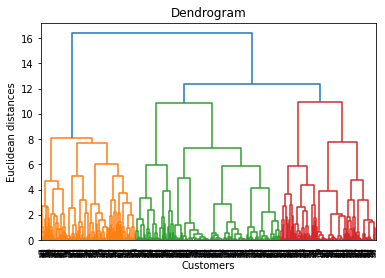

In [24]:
 #Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

По дендрограмме видно, что оптимально выделить 2 кластера. Однако, такое распределение является бональным и не целесообразным с точки зрения дальнейшего исследования. Поэтому стоит выделить большее число кластеров - 3, 4 и 5.

# Baseline model

In [25]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc2 = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

In [40]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc3 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

In [41]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc4 = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

In [28]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc5 = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

# Variable kernel

In [32]:
X_vk = ['Gender','Married','Dependents','Education','Credit_History','Loan_Status']

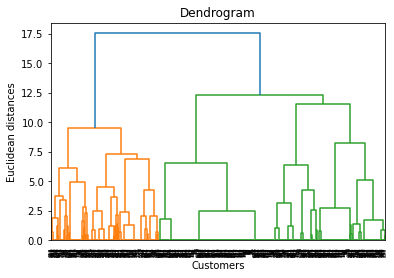

In [33]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df[X_vk], method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [35]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc3_vk = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward').fit_predict(df[X_vk])

In [36]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc4_vk = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward').fit_predict(df[X_vk])

# Pickle results

In [37]:
# Export hc clusters
import pickle
obj = {'hc2': hc2}
output = open('clust-hc2.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()

In [38]:
# Export hc clusters
import pickle
obj = {'hc3': hc3}
output = open('clust-hc3.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()

In [42]:
# Export hc clusters
import pickle
obj = {'hc4': hc4}
output = open('clust-hc4.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()

In [43]:
# Export hc clusters
import pickle
obj = {'hc5': hc5}
output = open('clust-hc5.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()

In [45]:
# Export hc clusters
import pickle
obj = {'hc3_vk': hc3_vk}
output = open('clust-hc3_vk.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()

In [46]:
# Export hc clusters
import pickle
obj = {'hc4_vk': hc4_vk}
output = open('clust-hc4_vk.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()

В итоге, было получено 6 различных моделей, как на всех переменных, так и на переменных с вариативными ядрами. Следующим шагом следует сравнить полученный результат с методом к-средних и выбрать оптимальное расделение.